# ECON408: Assignment 3

Jesse Perla, UBC

## Student Name/Number: (doubleclick to edit)

### Instructions

-   Edit the above cell to include your name and student number.
-   Submit just this `ipynb` to Canvas. Do not rename, it associates
    your student number with the submission automatically.

In [1]:
using Distributions, Plots, LaTeXStrings, LinearAlgebra, Statistics, Random

## Question 1

Following the notes on [AR(1)
processes](https://jlperla.github.io/ECON408/lectures/stochastic_dynamics.html#/title-slide)
rather than plotting the distribution as normal instead lets see what
the stationary distribution looks like with simulation.

### Part (a)

From $X_0 = 1.0$ simulate up to $T=1000$ using the process

$$
X_t = a X_{t-1} + b + c W_t
$$

Where $a=0.9, b=0.1, c=0.5$.

In [2]:
T = 1000
X_0 = 1.0
a = 0.9
b = 0.1
c = 0.5
# Add code here

0.5

### Part (b)

On the same graph plot the histogram of those simulated values (i.e.,
$\{X_0, \ldots X_T\}$) then plot the density of the stationary
distribution calculated in closed from in [those
notes](https://julia.quantecon.org/introduction_dynamics/ar1_processes.html#equation-mu-sig-star)
(i.e. create a normal distribution with $\mu^* = b/(1-a)$ and
$v^* = c^2/(1 - a^2)$

Hint: `histogram(X, normed=true)` normalizes the empirical draws so they
are a proper PMF.

In [4]:
# Add code here

### Part (c)

What happens if you discard the first 200 observations from that
simulation (i.e., $\{X_{199}, \ldots X_T\}$))?

In [6]:
# Add code here

Do these line up approximately? Explain why it may be better or worse?

(double click to edit your answer)

Reusable functions, do not modify without clearly annotating your
changes.

In [8]:
function lorenz(v)  # assumed sorted vector
    S = cumsum(v)  # cumulative sums: [v[1], v[1] + v[2], ... ]
    F = (1:length(v)) / length(v)
    L = S ./ S[end]
    return (; F, L) # returns named tuple
end
# Assumes that v is sorted!
gini(v) = (2 * sum(i * y for (i,y) in enumerate(v))/sum(v)
           - (length(v) + 1))/length(v)

gini (generic function with 1 method)

## Question 2

You can create a Pareto distribution with tail parameter `a` and draw
from it with

In [9]:
a = 1.5
d = Pareto(a)
rand(d, 3)

3-element Vector{Float64}:
 1.020632110453245
 3.345907772494828
 1.3865928191713668

The gini coefficient of a Pareto distribution is given by

$$
G = \frac{1}{2a - 1}
$$

### Part (a)

Draw `N=1000` observations from the Pareto distribution for `a = 1.5`
and calculate the gini coefficient. Compare to the closed-form solution

In [10]:
N = 1000
a = 1.5
# your code here

1.5

### Part (b)

Given a pdf $f(x)$ the cumulative distribution function is given by
$F(x) = \int_{-\infty}^x f(y) dy$. The complementary cumulative
distribution function (CCDF) is given by $F^c(x) = 1 - F(x)$. It starts
at $1$ at the minimum of the support of the distribution and then drops
to $0$ at the maximum of the support.

Take the following code which calculates the CCDF for a distribution and
a range of values `x`.

For this, plot the relationship between the `log(x)` and
`log(ccdf(d,x))` for the distribution below (this is called a [log-log
plot](https://en.wikipedia.org/wiki/Log%E2%80%93log_plot)). Describe
what you know about this relationship?

In [12]:
ccdf(d, x) = 1 - cdf(d, x)

N = 1000
a = 1.5
d = Pareto(a)
max_x = 10.0
num_points = 100
x = range(support(d).lb, max_x, num_points)  # from the lower bound of support to max_x

# edit your code here

1.0:0.09090909090909091:10.0

### Part (b)

For the above case, numerically calculate the slope of this line
(easiest is just rise over run). Compare it to the tail parameter `a`.

In [14]:
# your code here

### Part (c)

Do we will do the [empirical
counterpart](https://en.wikipedia.org/wiki/Empirical_distribution_function).
Given unweighted vector $\{X_n\}_{n=1}^N$ of observations, we can define
the empirical CDF as

$$
\hat{F}(x) = \frac{\text{number of observations } X_n \leq x}{N}
$$

With the equivalent CCDF as $1 - \hat{F}(x)$.

The code below calculates the empirical CDF for some simulated data.
Adapt it to (1) draw `N` draws from the Pareto distribution above with
`a = 1.5`; (2) plot the same log-log plot as above; and (3) overlay the
plot with the theoretical log-log plot from the previous part to compare
the two.


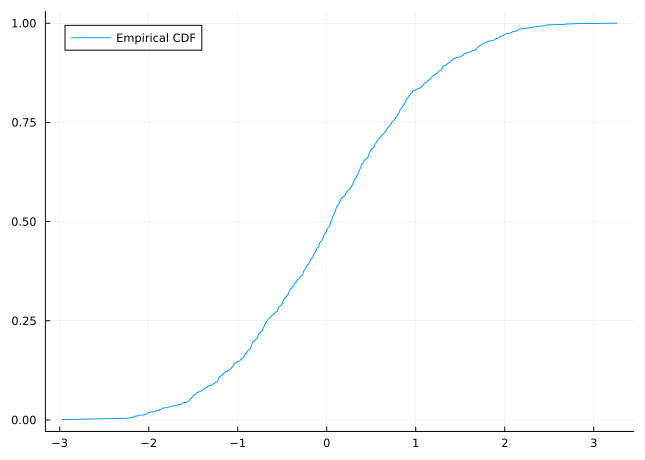

In [16]:
# your code to adapt
N = 1000
x = sort(randn(N))  # this draws normals, adapt to our areto
F_hat(x) = (1:length(x)) ./ length(x) # the cdf values at the x values are just the counts normalized by the total number of observations  No need to modify.
plot(x, F_hat(x), label="Empirical CDF") # adapt to do the log-log plot 

This shows methods for understanding the tail behavior of distributions.
If it approaches a straight line, then it is called a power-law tail.

### Part (d)

Now lets do the same empirical check on the tail behavior with a
LogNormal distribution - which does not have a power-law tail and the
[Frechet](https://en.wikipedia.org/wiki/Fr%C3%A9chet_distribution)
distribution - which does.

First, adapt your code above to (1) draw `N=1000` elements from the
`LogNormal(0.0, 0.5)` (2) plot the pdf to get a feel for the
distribution on a reasonable range, then finally (3) plot the
theoretical and empirical log-log plots as you did before.

In [18]:
# your code to adapt
N = 1000
d = LogNormal(0.0, 0.5)
# add code here to plot the pdf
# add code for the log-log plot

LogNormal{Float64}(μ=0.0, σ=0.5)

In [19]:
# your code to adapt
# add code for the log-log plot

Next do the same thing except with a `Frechet(1.5, 1)` (which has a tail
parameter of 1.5).

In [22]:
# your code to adapt
N = 1000
d = Frechet(1.5, 1.0)
# add code here to plot the pdf
# add code for the log-log plot

Frechet{Float64}(α=1.5, θ=1.0)

In [23]:
# your code to adapt
# add code for the log-log plot

### Part (e)

Comparing your answers in Part (d) and (c) what do you notice is
different theoretically between the log-log plots of distributions with
and without power-law tails? Play around with it and see if you feel you
could just look at an empirical plot and tell if it is a power-law tail
or not?

(double click to edit your answer)